# Initial Dataset Exploration

In [955]:
import sys
import os
import importlib


In [956]:
# Add project to path so we can import our modules
sys.path.append(os.path.abspath(".."))

In [957]:
# Import functionality from our source code
import src.data_loading.data_loader as data_loader
importlib.reload(data_loader)
from src.data_loading.data_loader import load_data, get_numerical_features, get_categorical_features

In [958]:
# Load the data
df = load_data()

Loading data from c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\data\raw\credit_score_dataset.csv
Loaded dataset with 100000 rows and 27 columns


In [959]:
# Display the first 5 rows of the dataset for a quick glance
print("\nFirst 5 Rows of the Dataset:\n")
df.head()


First 5 Rows of the Dataset:



,ID,Customer_ID,Month,Name,City,Street,Age,SSN,Occupation,Annual_Income,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Credit_Score
0,NaN,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,821-00-0265,Manager,19114.12,...,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529544,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.2802216,3
2,0x1604,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,821-00-0265,Manager,19114.12,...,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.69952126,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580744,3
4,NaN,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.42015309,3


In [960]:
# Display dataset shape in a readable format
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

Dataset Shape: 100000 rows, 27 columns



In [961]:
# Display dataset information in a readable format
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        90058 non-null   object 
 1   Customer_ID               90107 non-null   object 
 2   Month                     90062 non-null   object 
 3   Name                      81113 non-null   object 
 4   City                      90149 non-null   object 
 5   Street                    90080 non-null   object 
 6   Age                       85512 non-null   float64
 7   SSN                       89999 non-null   object 
 8   Occupation                90056 non-null   object 
 9   Annual_Income             89906 non-null   object 
 10  Monthly_Inhand_Salary     76405 non-null   float64
 11  Num_Bank_Accounts         90167 non-null   float64
 12  Num_Credit_Card           89938 non-null   float64
 13  Interest_Rate          

In [962]:
list_numerical_features = get_numerical_features(df)

print("\nNumeric columns:")
for col in list_numerical_features:
    print(f"{col}: {df[col].dtype}")


Numeric columns:
Age: float64
Monthly_Inhand_Salary: float64
Num_Bank_Accounts: float64
Num_Credit_Card: float64
Interest_Rate: float64
Delay_from_due_date: float64
Num_Credit_Inquiries: float64
Credit_Utilization_Ratio: float64
Credit_Score: int64


In [963]:
list_categorical_features = get_categorical_features(df)

print("\nCategorical columns:")
for col in list_categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical columns:
ID: object
Customer_ID: object
Month: object
Name: object
City: object
Street: object
SSN: object
Occupation: object
Annual_Income: object
Num_of_Loan: object
Type_of_Loan: object
Num_of_Delayed_Payment: object
Changed_Credit_Limit: object
Credit_Mix: object
Outstanding_Debt: object
Credit_History_Age: object
Payment_of_Min_Amount: object
Amount_invested_monthly: object


We identified columns that should be numeric

# Preprocessing part

## Categorical features

In [964]:
import src.preprocessing.categorical.categorical_features as categorical_features
importlib.reload(categorical_features)
from src.preprocessing.categorical.categorical_features import *

In [965]:
visualize_unique_categories(df, list_categorical_features);


Column 'ID' (90058 uniques):
the length of the list is too long to be printed entirely. Sample:
['0x1603', '0x1604', '0x1605', '0x1607', '0x1608', '0x1609', '0x160e', '0x160f', '0x1610', '0x1611']



Column 'Customer_ID' (12500 uniques):
the length of the list is too long to be printed entirely. Sample:
['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0xb891', 'CUS_0x1cdb', 'CUS_0x95ee', 'CUS_0x284a', 'CUS_0x5407', 'CUS_0x4157', 'CUS_0xba08']

Column 'Month' (8 uniques):
['February', 'April', 'May', 'June', 'July', 'August', 'January', 'March']

Column 'Name' (10139 uniques):
the length of the list is too long to be printed entirely. Sample:
['Aaron Maashoh', 'Rick Rothackerj', 'Langep', 'Jasond', 'Deepaa', 'Np', 'Nadiaq', 'Annk', 'Charlie Zhur', 'Jamesj']

Column 'City' (4 uniques):
['Lonton', 'Standhampton', 'BadShire', 'ZeroVille']

Column 'Street' (31 uniques):
['Oxford Street', 'Old Street', 'Downing Street', 'Jubilee Street', 'Elm Street', 'Market Street', 'King Street', 'Abbey Drive', 'Imperial Street', 'Main Street', 'Fleet Street', 'Grove Street', 'Queen Street', 'High Street', 'South Street', 'North Street', 'Trafalgar Street', 'MemoryStreet', 'Lombard Street', 'Regent Str

### Drop Identifiers Columns

In [966]:
IDENTIFIERS_TO_DROP = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN'
]

# drop the columns that are purely identifiers and that can add bias to the model
df = df.drop(columns=IDENTIFIERS_TO_DROP)

### Handle "Street" feature

In [967]:
df = add_space_before_word(df, feature_column='Street', separator_word='Street')

### Handle "Credit History Age" feature

In [968]:
print("Credit_History_Age information before parsing:")
df["Credit_History_Age"].info()

print("\n"+"-"*100+"\n")

df["Credit_History_Age"] = df["Credit_History_Age"].apply(parse_string_time_period)

print("Credit_History_Age information after parsing:")
df["Credit_History_Age"].info()

Credit_History_Age information before parsing:
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count  Dtype 
--------------  ----- 
81791 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB

----------------------------------------------------------------------------------------------------

Credit_History_Age information after parsing:
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count  Dtype  
--------------  -----  
81791 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


### Handle "Type of Loan" feature - Converting in Multiple Binary Numeric Features

In [969]:
# ANOTHER IDEA COULD BE TO LEAVE THE FEATURE AS IT IS, AND ONLY AFTER HANDLING MISSING VALUES, 
# MOVING THIS CELL IN THE SECTION REGARDING THE ENCODING OT CATEGORICAL FEATURES


In [970]:
# Handling Type of Loan feature
original_count_unique_categories = df['Type_of_Loan'].nunique()

visualize_top_n_categories(df, column='Type_of_Loan', top_n=25);

df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Missing_Loan')

unique_loan_types_and_counts = get_unique_values_and_counts(df, column='Type_of_Loan')

# Print the discovered loan types and their frequencies
print(f"Discovered {len(unique_loan_types_and_counts)} unique values")
for unique_value, count in list(unique_loan_types_and_counts.items()): 
    print(f"- {unique_value}: {count:,} occurrences")


df = transform_to_binary_features(df, column='Type_of_Loan', unique_values=unique_loan_types_and_counts.keys(), feature_name='Loan')


# add "Loan" suffix to the column "Has_Not_Specified" for better readability
df.rename(columns={'Has_Not_Specified': 'Has_Not_Specified_Loan'}, inplace=True)

# Verify the transformation
print(f"\nOriginal unique values:", {original_count_unique_categories})
print("\nBinary Features (numeric) created from the categories of 'Type of Loan':")
for col in [c for c in df.columns if c.startswith('Has_')]:
    print(f"- {col}: {df[col].sum():,} records - type: {df[col].dtype}")


# Drop the original Type_of_Loan column
df.drop(columns=['Type_of_Loan'], inplace=True)





Top 25 Categories (out of 6261 unique values):
Total records analyzed: 100000

Detailed breakdown:
 1. Missing                                                                20,312 records (20.31%)
 2. Not Specified                                                           1,272 records (1.27%)
 3. Credit-Builder Loan                                                     1,143 records (1.14%)
 4. Debt Consolidation Loan                                                 1,133 records (1.13%)
 5. Personal Loan                                                           1,128 records (1.13%)
 6. Student Loan                                                            1,117 records (1.12%)
 7. Payday Loan                                                             1,061 records (1.06%)
 8. Mortgage Loan                                                           1,058 records (1.06%)
 9. Auto Loan                                                               1,024 records (1.02%)
10. Home Equity L

### Handle object columns with problematic-numeric values and convert to numeric

In [971]:
import src.preprocessing.categorical.problematic_numeric_values as problematic_numeric_values
importlib.reload(problematic_numeric_values)
from src.preprocessing.categorical.problematic_numeric_values import convert_non_numeric_strings_to_nan, identify_problematic_characters,  remove_characters, convert_to_numeric

In [972]:
# Features that should be numerical but are currently 'object'

PROBLEMATIC_NUMERICAL_FEATURES = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly'
]

# Print info of the columns before cleaning and conversion to numeric
print("\nInfo for columns to be converted to numeric:")
print("-" * 50)
df[PROBLEMATIC_NUMERICAL_FEATURES].info()

# Convert strings that don't contain digits to NaN
df = convert_non_numeric_strings_to_nan(df, PROBLEMATIC_NUMERICAL_FEATURES)

# Identify problematic elements in the columns
print("Identifying problematic characters...\n")
problematic_characters = identify_problematic_characters(df, PROBLEMATIC_NUMERICAL_FEATURES)
print(f"\nProblematic characters found: {problematic_characters}")

print(f"\nRemoving problematic characters: {problematic_characters}")
df = remove_characters(df, PROBLEMATIC_NUMERICAL_FEATURES, problematic_characters)

non_numeric_characters = identify_problematic_characters(df, PROBLEMATIC_NUMERICAL_FEATURES)
print(f"\nNon-numeric characters found after cleaning: {non_numeric_characters}")

print("\nConverting to numeric...")
df = convert_to_numeric(df, PROBLEMATIC_NUMERICAL_FEATURES)

# Print info of the converted columns
print("\nInfo for numeric converted columns:")
print("-" * 50)
df[PROBLEMATIC_NUMERICAL_FEATURES].info()


Info for columns to be converted to numeric:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Annual_Income            89906 non-null  object
 1   Num_of_Loan              89809 non-null  object
 2   Num_of_Delayed_Payment   83782 non-null  object
 3   Changed_Credit_Limit     89933 non-null  object
 4   Outstanding_Debt         90037 non-null  object
 5   Amount_invested_monthly  85880 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB
Identifying problematic characters...


Column 'Annual_Income': 6292 values with problematic characters
--------------------------------------------------
Example 1: '34847.84_'
Example 2: '30689.89_'
Example 3: '35547.71_'

Column 'Num_of_Loan': 4267 values with problematic characters
-------------------------------------------

### Remaining categorical features

In [973]:
list_categorical_features = get_categorical_features(df)

print("\nCategorical columns:")
for col in list_categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical columns:
Month: object
City: object
Street: object
Occupation: object
Credit_Mix: object
Payment_of_Min_Amount: object


## Numeric Features (addressing constraints)

In [974]:
import src.preprocessing.numeric_features as numeric_features
importlib.reload(numeric_features)
from src.preprocessing.numeric_features import *

In [975]:
list_numerical_features = get_numerical_features(df)

print("\nNumeric columns:")
for col in list_numerical_features:
    print(f"{col}: {df[col].dtype}")


Numeric columns:
Age: float64
Annual_Income: float64
Monthly_Inhand_Salary: float64
Num_Bank_Accounts: float64
Num_Credit_Card: float64
Interest_Rate: float64
Num_of_Loan: float64
Delay_from_due_date: float64
Num_of_Delayed_Payment: float64
Changed_Credit_Limit: float64
Num_Credit_Inquiries: float64
Outstanding_Debt: float64
Credit_Utilization_Ratio: float64
Credit_History_Age: float64
Amount_invested_monthly: float64
Credit_Score: int64
Has_Payday_Loan: int64
Has_Credit_Builder_Loan: int64
Has_Not_Specified_Loan: int64
Has_Home_Equity_Loan: int64
Has_Mortgage_Loan: int64
Has_Personal_Loan: int64
Has_Student_Loan: int64
Has_Debt_Consolidation_Loan: int64
Has_Auto_Loan: int64
Has_Missing_Loan: int64


In [976]:
# Identify loan-related columns
loan_columns = [col for col in df.columns if 'Has' in col and 'Loan' in col]
print(f"\nLoan-related columns identified ({len(loan_columns)}):")

df_copy = df.copy()

# Create a separate dataframe for loan-related columns
# This preserves the original index for later merging if needed
df_loans = df_copy[loan_columns]

# Create a dataframe without loan-related columns
df_no_loans = df_copy.drop(columns=loan_columns)
print(f"Non-loans dataframe shape: {df_no_loans.shape}")




Loan-related columns identified (10):
Non-loans dataframe shape: (100000, 22)


In [977]:
# Define constraints by feature
CONSTRAINTS = {
    'Age': {'min': 10, 'max': 120, 'integer': True},
    
    'Annual_Income': {'min': 0, 'max': None, 'integer': False}, 
    
    'Monthly_Inhand_Salary': {'min': 0, 'max': None, 'integer': False}, 

    'Num_Bank_Accounts': {'min': 0, 'max': 50, 'integer': True},

    'Num_Credit_Card': {'min': 0, 'max': 50, 'integer': True},

    'Interest_Rate': {'min': 0, 'max': 100, 'integer': False},
    
    'Num_of_Loan': {'min': 0, 'max': 50, 'integer': True},
    
    'Delay_from_due_date': {'min': 0, 'max': 180, 'integer': True},
    
    'Num_of_Delayed_Payment': {'min': 0, 'max': None, 'integer': True}, 
   
    'Changed_Credit_Limit': {'min': None, 'max': None, 'integer': False}, 
   
    'Num_Credit_Inquiries': {'min': 0, 'max': 50, 'integer': True},
    
    'Outstanding_Debt': {'min': 0, 'max': None, 'integer': False},

    'Credit_Utilization_Ratio': {'min': 0, 'max': 100, 'integer': False},
    
    'Credit_History_Age': {'min': 0, 'max': 110, 'integer': False},

    'Amount_invested_monthly': {'min': 0, 'max': None, 'integer': False}, 

    'Credit_Score': {'min': 0, 'max': 3, 'integer': True}
}


numeric_features_before = get_numerical_features(df_no_loans)
print("\nNumeric columns Statistics - Before Setting Constraints:\n")
for col in numeric_features_before:
    print(f"{col}: {df_no_loans[col].describe()}\n")
print("\n"+"-"*100+"\n")

print("Setting constraints for numeric features...\n")
df_no_loans = set_constraints_for_numeric_features(df_no_loans, numeric_features_before, CONSTRAINTS)


numeric_features_after = get_numerical_features(df_no_loans)
print("\n"+"-"*100+"\n")
print("\nNumeric columns Statistics - After Setting Constraints:\n")
for col in numeric_features_after:
    print(f"{col}: {df_no_loans[col].describe()}\n")

# Merge back with the dataframe containing loans binary columns
df = pd.concat([df_no_loans, df_loans], axis=1)


Numeric columns Statistics - Before Setting Constraints:

Age: count    85512.000000
mean       110.226845
std        684.907588
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

Annual_Income: count    8.990600e+04
mean     1.765448e+05
std      1.429013e+06
min      7.005930e+03
25%      1.945305e+04
50%      3.757975e+04
75%      7.276004e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

Monthly_Inhand_Salary: count    76405.000000
mean      4185.789272
std       3178.560506
min        303.645417
25%       1625.023750
50%       3086.683333
75%       5940.317500
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

Num_Bank_Accounts: count    90167.000000
mean        17.105172
std        117.728215
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

Num_Credit_Card: count   

## Creation of a dummy dataset

In [978]:
dummy_dataset = df.select_dtypes(include=[np.number])

dummy_dataset.info()

dummy_dataset = dummy_dataset.dropna(axis=0, how='any').reset_index(drop=True)

dummy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          83110 non-null   float64
 1   Annual_Income                89906 non-null   float64
 2   Monthly_Inhand_Salary        76405 non-null   float64
 3   Num_Bank_Accounts            88994 non-null   float64
 4   Num_Credit_Card              87947 non-null   float64
 5   Interest_Rate                88343 non-null   float64
 6   Num_of_Loan                  85924 non-null   float64
 7   Delay_from_due_date          89479 non-null   float64
 8   Num_of_Delayed_Payment       83206 non-null   float64
 9   Changed_Credit_Limit         88058 non-null   float64
 10  Num_Credit_Inquiries         86634 non-null   float64
 11  Outstanding_Debt             90037 non-null   float64
 12  Credit_Utilization_Ratio     90025 non-null   float64
 13  

the dummy dataset created has only 10937 rows (because i removed all the missing values for each different feature) compared to the 100 000 rows from the original one. 

In [979]:
# The following script is only for saving the dummy dataset on the folder data / dummy_dataset (leave it commented)

'''
import pathlib

script_dir = pathlib.Path.cwd()
project_root = script_dir.parent

# 4) Build the path to data/dummy_dataset
save_dir = project_root / 'data' / 'dummy_dataset'
save_dir.mkdir(parents=True, exist_ok=True)         # just in case


# Save to CSV
save_path = save_dir / 'dummy_dataset.csv'
dummy_dataset.to_csv(save_path, index=False)
print(f"Saved Dummy Dataset to {save_path}")

'''

'\nimport pathlib\n\nscript_dir = pathlib.Path.cwd()\nproject_root = script_dir.parent\n\n# 4) Build the path to data/dummy_dataset\nsave_dir = project_root / \'data\' / \'dummy_dataset\'\nsave_dir.mkdir(parents=True, exist_ok=True)         # just in case\n\n\n# Save to CSV\nsave_path = save_dir / \'dummy_dataset.csv\'\ndummy_dataset.to_csv(save_path, index=False)\nprint(f"Saved Dummy Dataset to {save_path}")\n\n'

# Missing Values Handling

In [980]:
import src.preprocessing.missing_values.missing_values_processing as missing_values
importlib.reload(missing_values)
from src.preprocessing.missing_values.missing_values_processing import *

## Handle Missing values for categorical features

In [981]:
visualize_proportion_of_unique_categories(df, list_categorical_features)



# Define imputation methods by feature

# My idea was to use an unknown category in the case from my domain knowledge 
# i know that the categories for a feature are possibly not all present 
# and that the unknown category could be a good representation of the missing categories,
# but ensuring that this new category would not strongly skew the distribution of the feature categories

# THE ONLY CONCERN IS FOR VARIABLES Credit_Mix AND Payment_of_Min_Amount, 


IMPUTATION_METHODS = {  # keep this dictionary for now in case you apply different imputations 
    
    'Month': 'unknown_category',

    'City': 'unknown_category',

    'Street': 'unknown category',

    'Occupation': 'unknown_category',

    'Credit_Mix': 'unknown_category',

    'Payment_of_Min_Amount': 'unknown_category', 
} 

df_before_missing = df.copy()

def fill_missing_with_category(df, feature_column, value_to_fill):
    
    df[feature_column] = df[feature_column].fillna(value_to_fill)
    return df

df = fill_missing_with_category(df, feature_column='Credit_Mix', value_to_fill='_')
df = fill_missing_with_category(df, feature_column='Payment_of_Min_Amount', value_to_fill='NM')


df[list_categorical_features] = df[list_categorical_features].fillna('Unknown')

#plot_distribution_comparison_for_categorical(df_before_missing, df, list_categorical_features)

visualize_proportion_of_unique_categories(df, list_categorical_features)



Column 'Month' has 9 unique categories:

All categories (proportion) for column 'Month':

April: 11.32%
May: 11.32%
June: 11.28%
February: 11.25%
July: 11.24%
January: 11.24%
August: 11.22%
March: 11.19%
Missing: 9.94%

----------------------------------------------------------------------------------------------------


Column 'City' has 5 unique categories:

All categories (proportion) for column 'City':

Standhampton: 47.74%
BadShire: 26.07%
Lonton: 16.02%
Missing: 9.85%
ZeroVille: 0.32%

----------------------------------------------------------------------------------------------------


Column 'Street' has 32 unique categories:

Showing top 10 most frequent categories (proportion) for column 'Street':

Missing: 9.92%
Quality Street: 5.34%
Memory Street: 5.17%
Fleet Street: 5.15%
High Street: 5.05%
Jubilee Street: 5.00%
Old Street: 4.96%
Grove Street: 4.88%
New Street: 4.85%
Pine Street: 4.83%

--------------------------------------------------------------------------------------

# Categorical Features Encoding

In [ ]:
encoding_strategies = {
    'Month': {'January': 1, 'February': 2, 'March': 3, 'April': 4, 
                       'May': 5, 'June': 6, 'July': 7, 'August': 8, 
                       'September': 9, 'October': 10, 'November': 11, 'December': 12, 
                       'Unknown': -1},
    'City': 'one-hot',
    'Street': 'frequency',
    'Occupation': ('target', 'frequency'),  # Two options to try
    'Credit_Mix': {'Bad': 1, 'Standard': 2, 'Good': 3, '_': 0, 'Unknown': -1},
    'Payment_of_Min_Amount': ('one-hot', 'ordinal')  # Two options to try
}


def encode_categorical_features(df, encoding_strategy=None, occupation_encoding='target', payment_encoding='one-hot'):
    """
    Encode categorical features according to the specified strategies.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The input dataframe with categorical features
    encoding_strategy : dict, optional
        Dictionary with feature names as keys and encoding types as values
    occupation_encoding : str, optional
        The encoding strategy for Occupation ('target' or 'frequency')
    payment_encoding : str, optional
        The encoding strategy for Payment_of_Min_Amount ('one-hot' or 'ordinal')
    
    Returns:
    --------
    pandas DataFrame
        Dataframe with encoded features
    """
    # Create a copy of the dataframe
    df_encoded = df.copy()
    
    # Use default encoding strategy if none provided
    if encoding_strategy is None:
        raise ValueError("Encoding strategy is required")
    
    # Month - Ordinal Encoding
    if 'Month' in df.columns:
        month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 
                       'May': 5, 'June': 6, 'July': 7, 'August': 8, 
                       'September': 9, 'October': 10, 'November': 11, 'December': 12, 
                       'Unknown': 0}
        df_encoded['Month'] = df['Month'].map(month_order)
    
    # City - One-Hot Encoding
    if 'City' in df.columns and encoding_strategy['City'] == 'one-hot':
        city_dummies = pd.get_dummies(df['City'], prefix='City', drop_first=False)
        df_encoded = pd.concat([df_encoded, city_dummies], axis=1)
        df_encoded.drop('City', axis=1, inplace=True)
    
    # Street - Frequency Encoding
    if 'Street' in df.columns and encoding_strategy['Street'] == 'frequency':
        street_freq = df['Street'].value_counts(normalize=True).to_dict()
        df_encoded['Street'] = df['Street'].map(street_freq)
    
    # Occupation - Target or Frequency Encoding
    if 'Occupation' in df.columns:
        if encoding_strategy['Occupation'] == 'target':
            # Assuming the target column is named 'Credit_Score'
            if 'Credit_Score' in df.columns:
                occupation_target_map = df.groupby('Occupation')['Credit_Score'].mean().to_dict()
                df_encoded['Occupation'] = df['Occupation'].map(occupation_target_map)
            else:
                # Fallback to frequency encoding if target column is not available
                occupation_freq = df['Occupation'].value_counts(normalize=True).to_dict()
                df_encoded['Occupation'] = df['Occupation'].map(occupation_freq)
        else:  # frequency encoding
            occupation_freq = df['Occupation'].value_counts(normalize=True).to_dict()
            df_encoded['Occupation'] = df['Occupation'].map(occupation_freq)
    
    # Credit_Mix - Ordinal Encoding
    if 'Credit_Mix' in df.columns:
        credit_mix_order = {'Bad': 1, 'Standard': 2, 'Good': 3, '_': 0, 'Unknown': 0}
        df_encoded['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_order)
    
    # Payment_of_Min_Amount - One-Hot or Ordinal Encoding
    if 'Payment_of_Min_Amount' in df.columns:
        if encoding_strategy['Payment_of_Min_Amount'] == 'one-hot':
            payment_dummies = pd.get_dummies(df['Payment_of_Min_Amount'], prefix='Payment', drop_first=False)
            df_encoded = pd.concat([df_encoded, payment_dummies], axis=1)
            df_encoded.drop('Payment_of_Min_Amount', axis=1, inplace=True)
        else:  # ordinal encoding
            payment_order = {'No': 0, 'NM': 1, 'Yes': 2}
            df_encoded['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(payment_order)
    
    return df_encoded

## Handle Missing values for numeric features

In [982]:
import src.preprocessing.missing_values.knn_imputation as knn_imputation
importlib.reload(knn_imputation)
from src.preprocessing.missing_values.knn_imputation import *

In [983]:
# Randomly select 10000 rows from the original dataset
dummy_dataset = df.sample(n=10000, random_state=42)

# Keep only numeric columns
dummy_dataset = dummy_dataset.select_dtypes(include=[np.number])

dummy_dataset.info()

# Analyze missing values for numeric features
missing_stats_for_num_features = analyze_missing_values(dummy_dataset[list_numerical_features])
print("\nMissing Value Statistics for Numerical features:\n")
print(missing_stats_for_num_features)


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 75721 to 74479
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          8346 non-null   float64
 1   Annual_Income                9012 non-null   float64
 2   Monthly_Inhand_Salary        7639 non-null   float64
 3   Num_Bank_Accounts            8876 non-null   float64
 4   Num_Credit_Card              8814 non-null   float64
 5   Interest_Rate                8878 non-null   float64
 6   Num_of_Loan                  8654 non-null   float64
 7   Delay_from_due_date          8986 non-null   float64
 8   Num_of_Delayed_Payment       8329 non-null   float64
 9   Changed_Credit_Limit         8824 non-null   float64
 10  Num_Credit_Inquiries         8699 non-null   float64
 11  Outstanding_Debt             9083 non-null   float64
 12  Credit_Utilization_Ratio     8982 non-null   float64
 13  Credit_History_Ag

In [984]:
num_columns_with_missing = missing_stats_for_num_features.index.tolist()

print(f"Evaluating KNN imputation method for {len(num_columns_with_missing)} numeric columns")
dummy_dataset, results_dict = apply_and_evaluate_knn_imputation(df=dummy_dataset, columns=num_columns_with_missing)

print(results_dict)

# Check missing values for numeric features after imputation
missing_stats_for_num_features = analyze_missing_values(dummy_dataset[list_numerical_features])
print("\n Check Missing values after imputations :\n")
print(missing_stats_for_num_features)

Evaluating KNN imputation method for 15 numeric columns

Evaluating KNN imputation (k = 3) for column 'Monthly_Inhand_Salary'



KeyboardInterrupt: 

## Outliers Handling

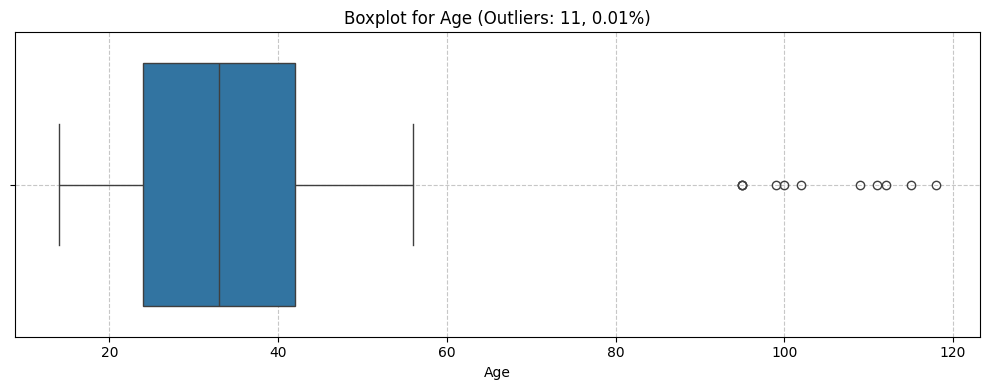

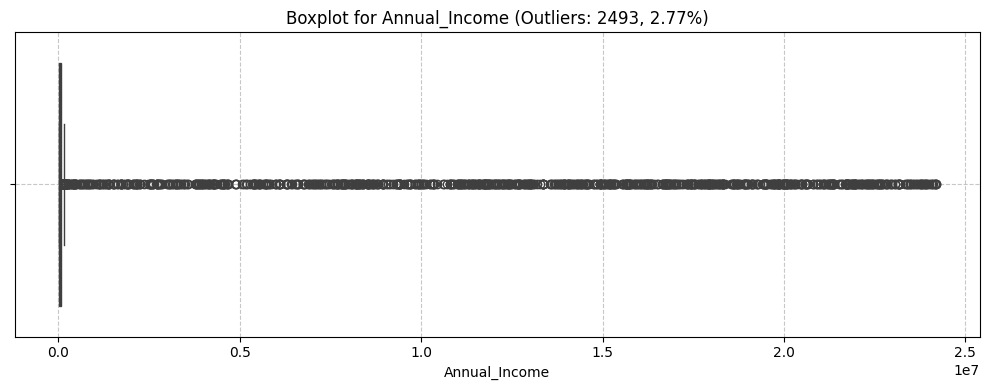

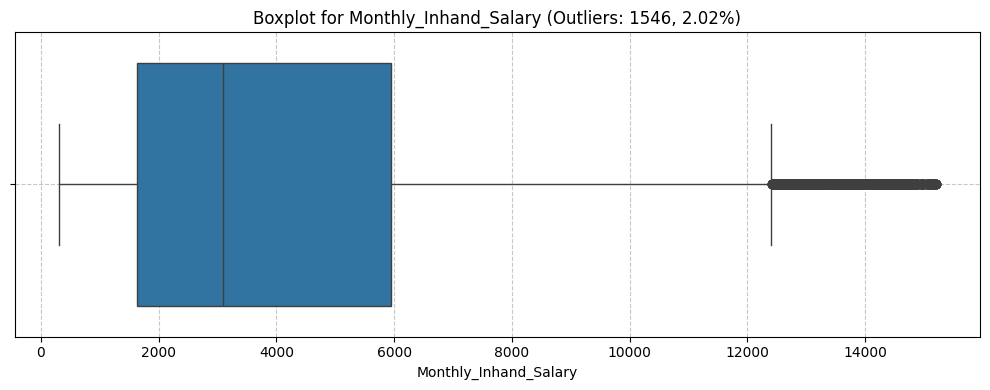

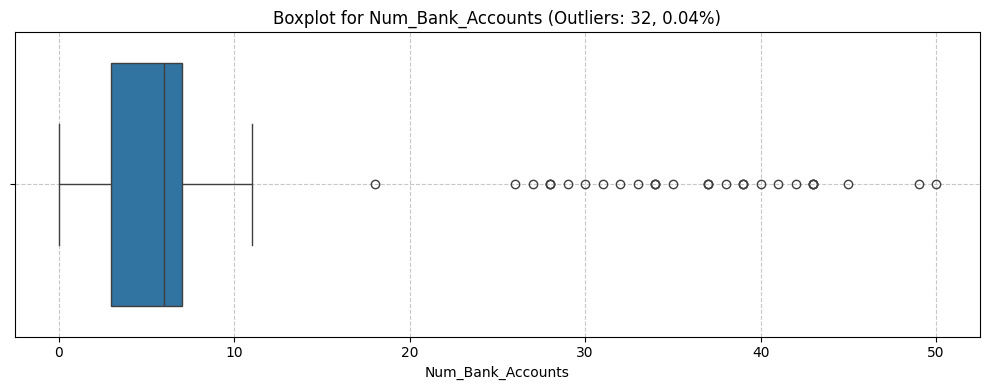

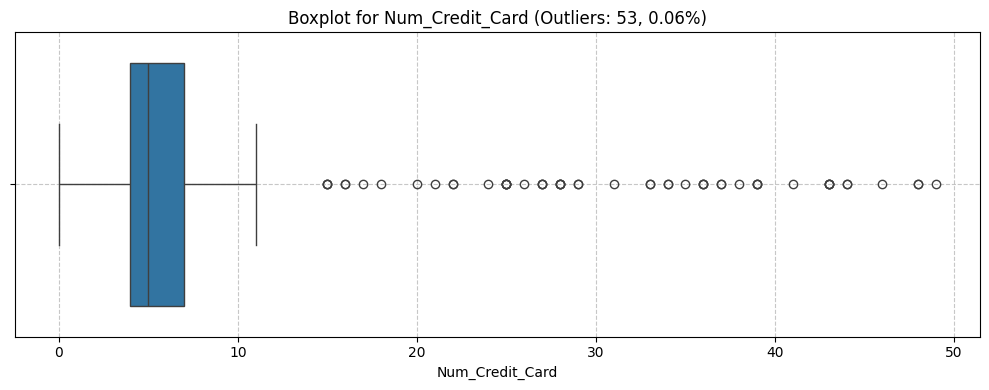

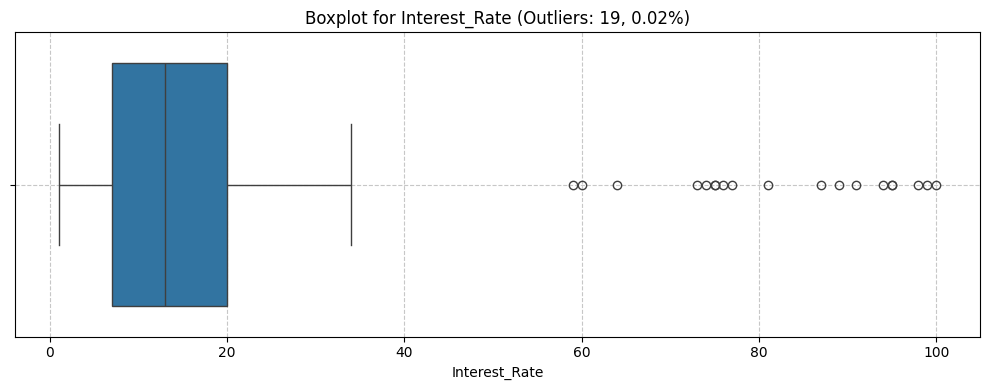

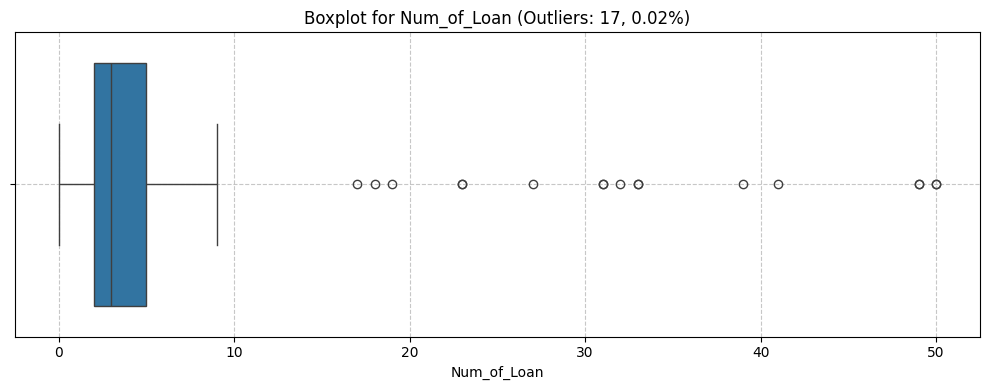

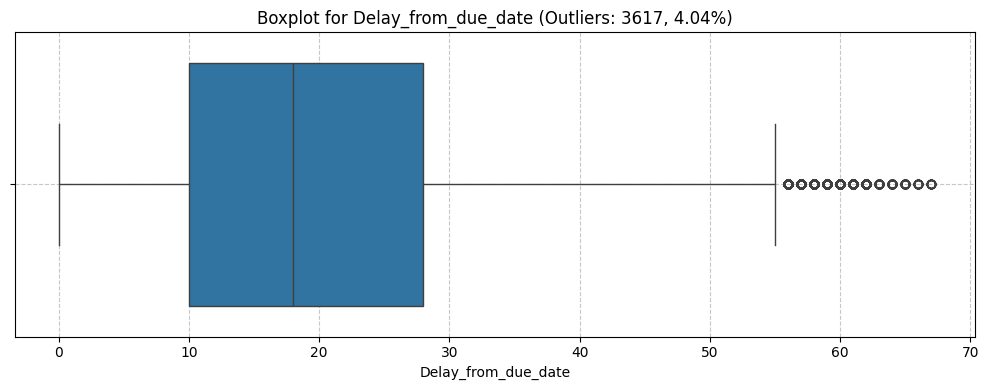

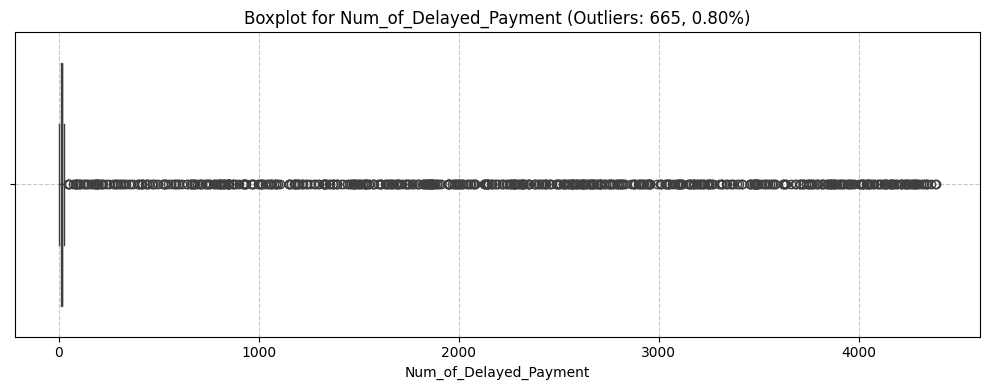

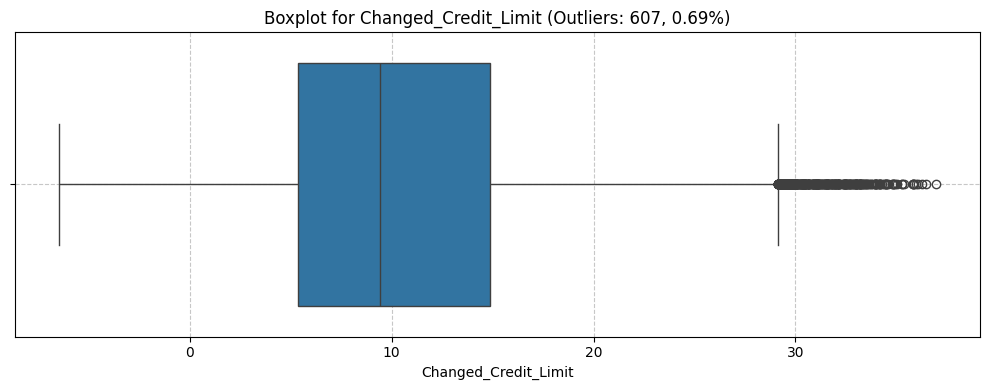

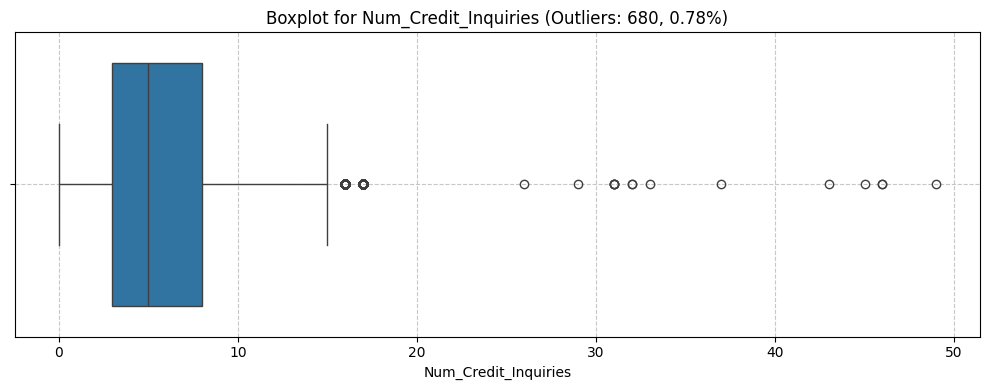

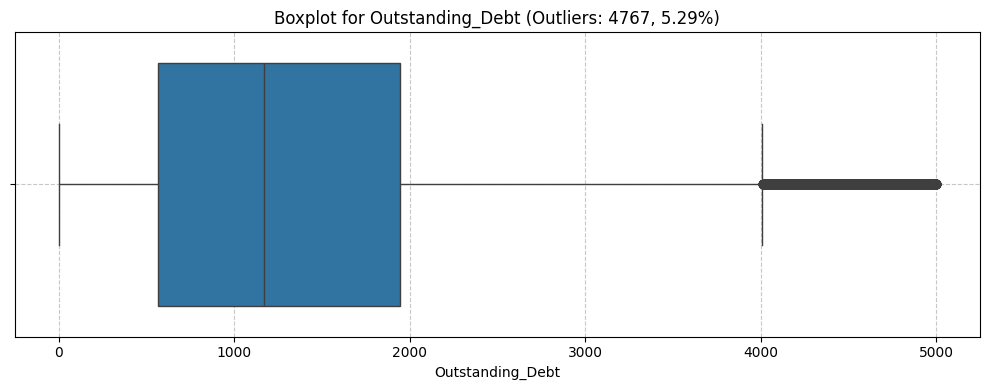

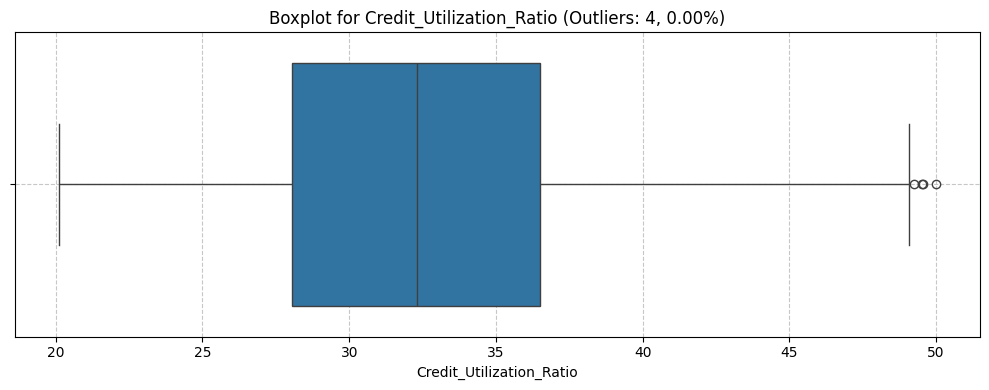

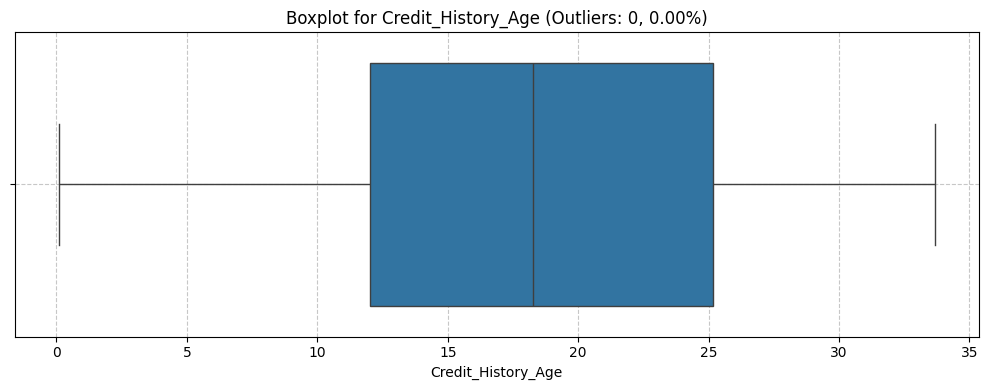

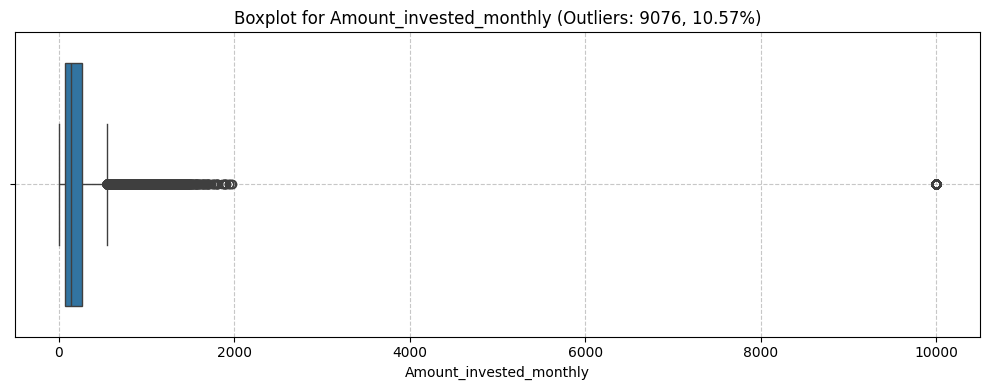

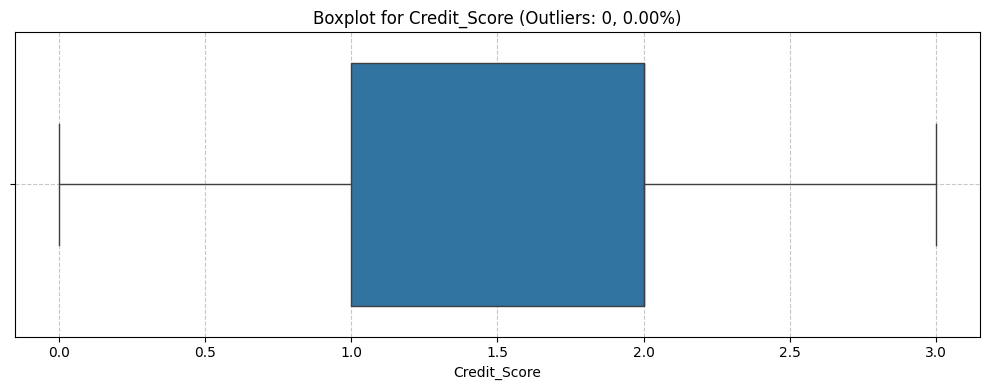

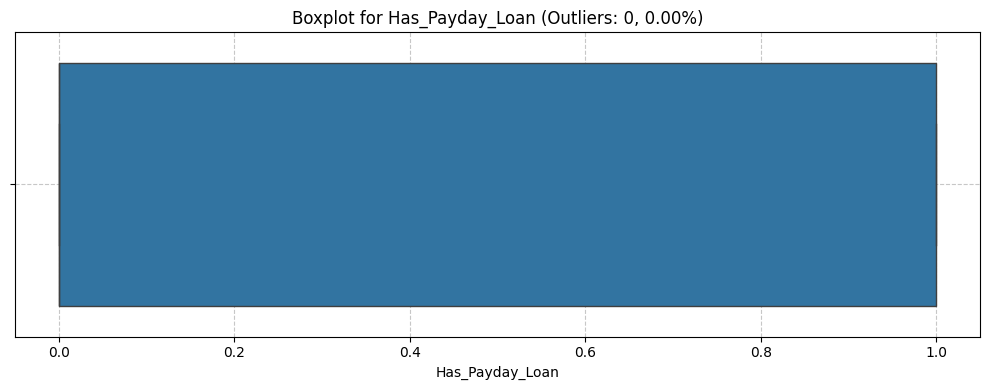

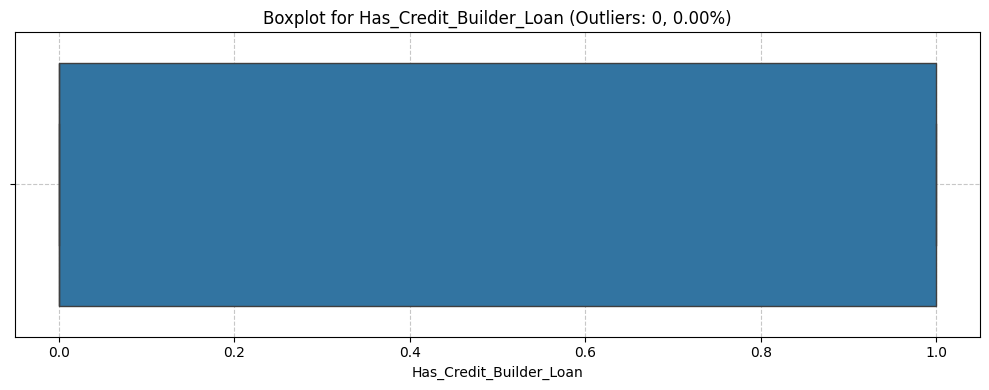

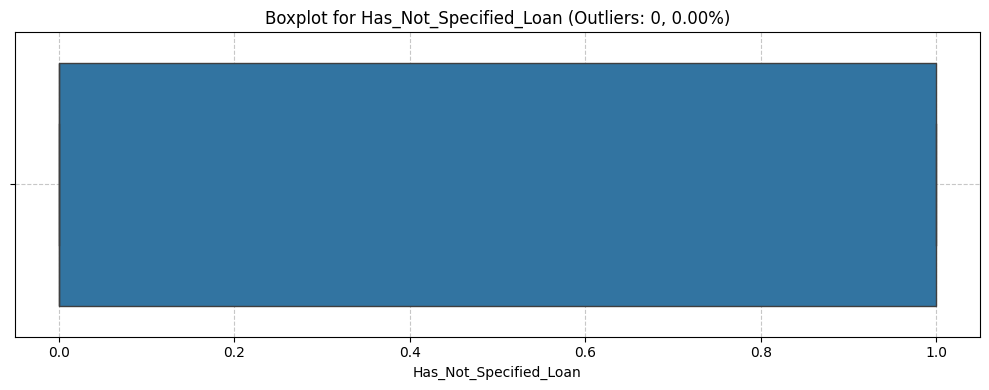

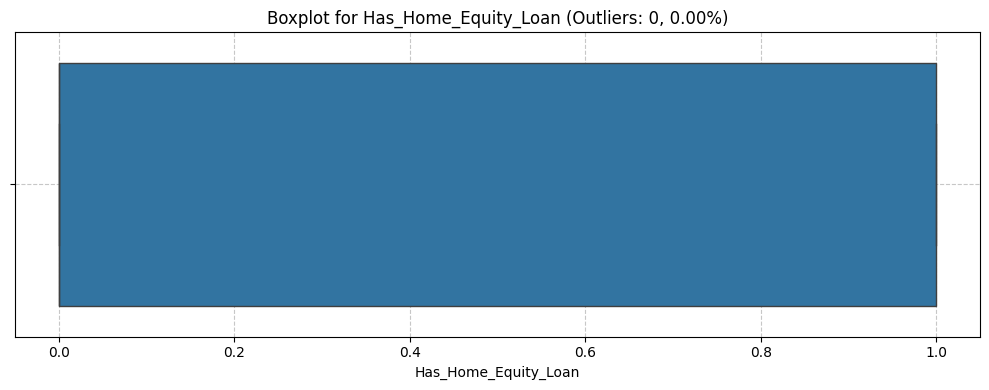

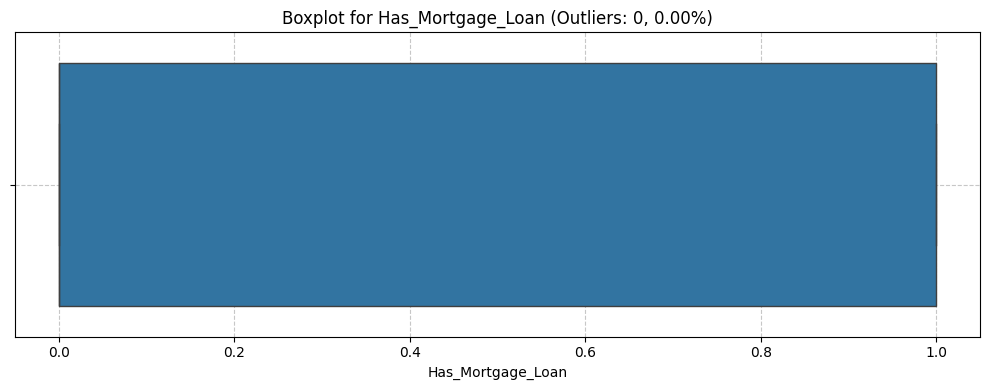

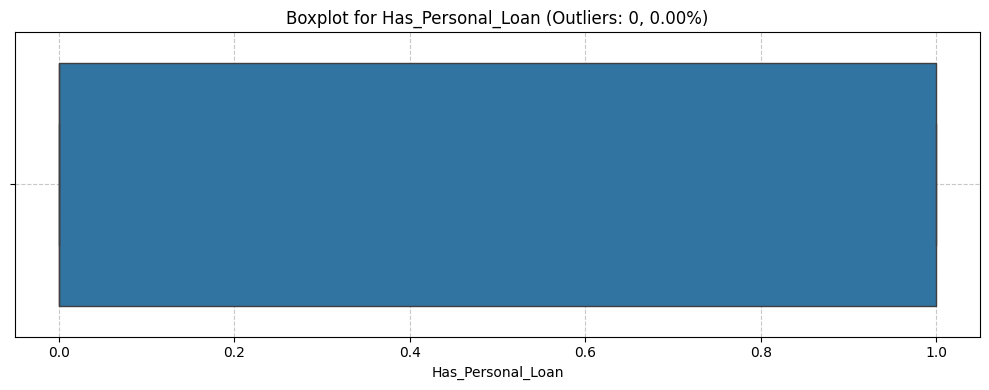

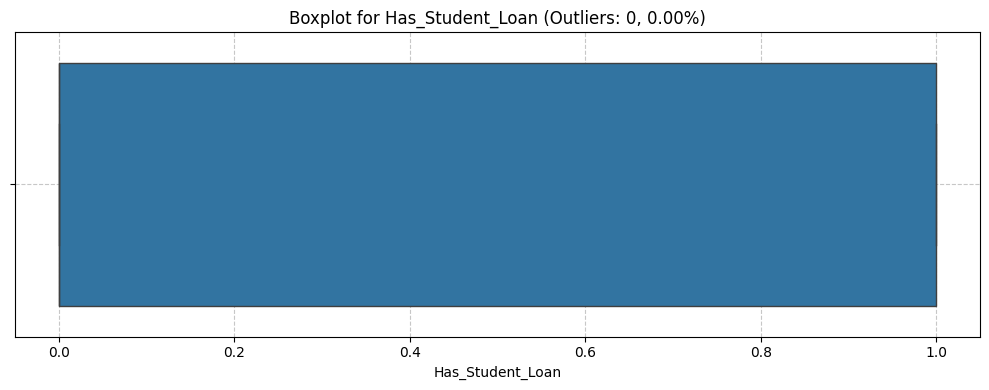

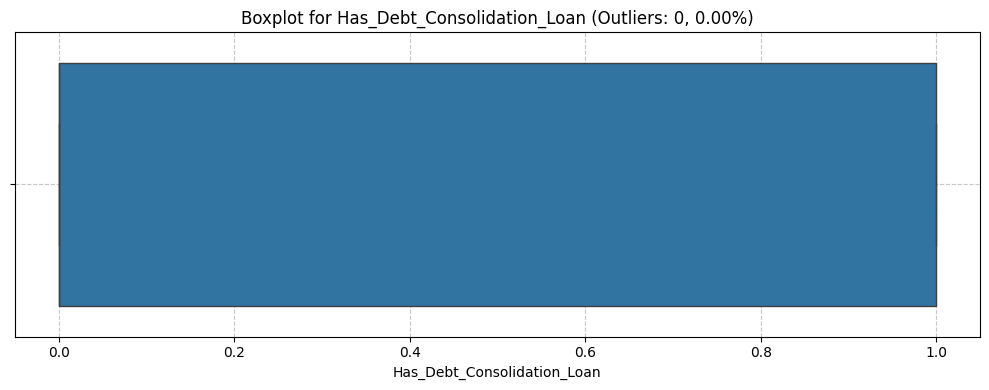

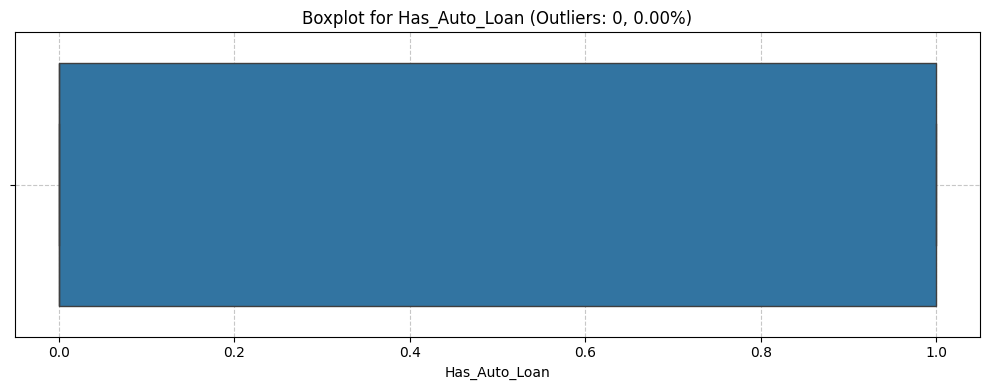

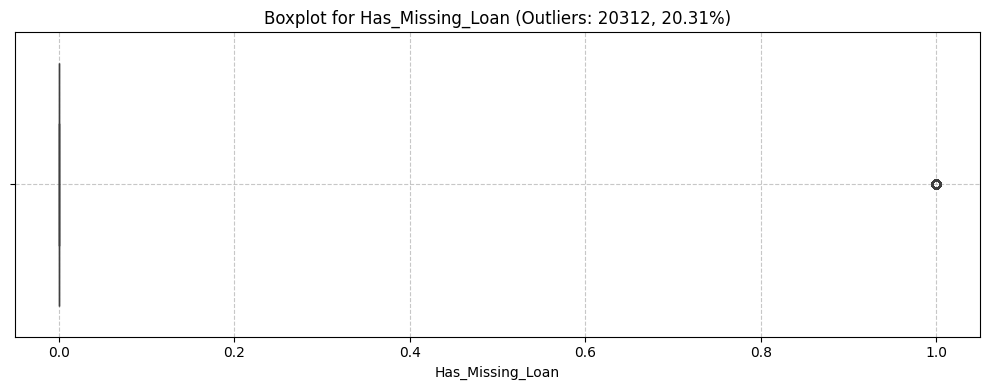

,Count,Mean,Std,Min,Q1,50%,Q3,Max,IQR,Outliers Count,Outliers %,Z-score Outliers,Skewness
Age,83110,33.33,10.80,14.00,24.00,33.00,42.00,118.00,18.00,11,0.01%,11,0.191399
Annual_Income,89906,176544.80,1429012.65,7005.93,19453.05,37579.75,72760.04,24198062.00,53306.99,2493,2.77%,749,12.510469
Monthly_Inhand_Salary,76405,4185.79,3178.56,303.65,1625.02,3086.68,5940.32,15204.63,4315.29,1546,2.02%,811,1.132229
Num_Bank_Accounts,88994,5.38,2.66,0.00,3.00,6.00,7.00,50.00,4.00,32,0.04%,32,0.448131
Num_Credit_Card,87947,5.55,2.17,0.00,4.00,5.00,7.00,49.00,3.00,53,0.06%,53,1.578409
Interest_Rate,88343,14.55,8.79,1.00,7.00,13.00,20.00,100.00,13.00,19,0.02%,19,0.591387
Num_of_Loan,85924,3.54,2.49,0.00,2.00,3.00,5.00,50.00,3.00,17,0.02%,17,0.897774
Delay_from_due_date,89479,21.22,14.80,0.00,10.00,18.00,28.00,67.00,18.00,3617,4.04%,47,0.980024
Num_of_Delayed_Payment,83206,31.27,227.14,0.00,9.00,14.00,18.00,4388.00,9.00,665,0.80%,575,14.192508
Changed_Credit_Limit,88058,10.39,6.78,-6.49,5.34,9.41,14.86,36.97,9.52,607,0.69%,173,0.636048


In [895]:
CONSTRAINTS = {
    'Age':  'domain'    ,  # Domain knowledge-based constraints
    
    'Annual_Income': 'iqr', # Income typically has skewed distribution, IQR works well
    
    'Monthly_Inhand_Salary': 'iqr', 

    'Num_Bank_Accounts':  'domain',

    'Num_Credit_Card':  'domain',

    'Interest_Rate':  'domain',
    
    'Num_of_Loan':  'domain',
    
    'Delay_from_due_date':  'domain',
    
    'Num_of_Delayed_Payment':  'zscore', # Z-score works well for count data
   
    'Changed_Credit_Limit':  'zscore', # Z-score for bidirectional changes (min can be negative)
   
    'Num_Credit_Inquiries':  'domain',
    
    'Outstanding_Debt':  'domain',

    'Credit_Utilization_Ratio':  'domain',
    
    'Credit_History_Age':  'domain',

    'Amount_invested_monthly':  'iqr', 

    'Credit_Score':  'domain',
}


def analyze_outliers(df, numerical_columns=None, plot_type='all', threshold=1.5):
    """
    Analyze outliers in numerical columns of a DataFrame.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        numerical_columns (list, optional): List of numerical columns to analyze. 
                                            If None, all numerical columns are analyzed.
        plot_type (str): Type of plot to generate ('boxplot', 'histplot', 'scatter', 'all')
        threshold (float): IQR multiplier to identify outliers (default: 1.5)
        
    Returns:
        pd.DataFrame: DataFrame with outlier statistics
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    
    # If no columns specified, use all numeric columns
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    # Initialize results DataFrame
    results = pd.DataFrame(
        index=numerical_columns,
        columns=['Count', 'Mean', 'Std', 'Min', 'Q1', '50%', 'Q3', 'Max', 
                 'IQR', 'Outliers Count', 'Outliers %', 'Z-score Outliers', 'Skewness']
    )
    
    # Analyze each column
    for column in numerical_columns:
        # Calculate statistics
        data = df[column].dropna()
        count = len(data)
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        
        # Define outlier boundaries using IQR method
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        
        # Identify outliers
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        outliers_count = len(outliers)
        outliers_percent = (outliers_count / count) * 100
        
        # Z-score outliers (|z| > 3)
        z_scores = np.abs(stats.zscore(data))
        z_outliers = data[z_scores > 3]
        z_outliers_count = len(z_outliers)
        
        # Calculate skewness
        skewness = data.skew()
        
        # Store results
        results.loc[column] = [
            count,
            data.mean(),
            data.std(),
            data.min(),
            q1,
            data.median(),
            q3,
            data.max(),
            iqr,
            outliers_count,
            outliers_percent,
            z_outliers_count,
            skewness
        ]
        
        # Generate plots based on plot_type
        if plot_type in ['boxplot', 'all']:
            plt.figure(figsize=(10, 4))
            plt.title(f'Boxplot for {column} (Outliers: {outliers_count}, {outliers_percent:.2f}%)')
            sns.boxplot(x=data)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        
        if plot_type in ['histplot', 'all']:
            plt.figure(figsize=(12, 5))
            plt.title(f'Distribution of {column} with Outlier Boundaries')
            sns.histplot(data, kde=True)
            
            # Add vertical lines for outlier boundaries
            plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
            plt.axvline(upper_bound, color='r', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
            
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
        if plot_type in ['scatter', 'all'] and len(numerical_columns) > 1:
            # Create scatter plot against index to visualize outliers
            plt.figure(figsize=(12, 5))
            plt.title(f'Scatter Plot for {column} with Outlier Boundaries')
            plt.scatter(range(len(data)), data, alpha=0.5)
            
            # Highlight outliers
            outlier_indices = data.index[data.isin(outliers)]
            plt.scatter(
                [data.index.get_loc(i) for i in outlier_indices], 
                outliers, 
                color='red', 
                alpha=0.8, 
                label=f'Outliers ({outliers_count})'
            )
            
            plt.axhline(lower_bound, color='r', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
            plt.axhline(upper_bound, color='r', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
            
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
    
    # Add a correlation heatmap if there are multiple numerical columns
    if plot_type in ['all'] and len(numerical_columns) > 1:
        plt.figure(figsize=(12, 10))
        plt.title("Correlation Heatmap")
        sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', 
                   linewidths=0.5, vmin=-1, vmax=1)
        plt.tight_layout()
        plt.show()
    
    # Format results for better readability
    formatted_results = results.copy()
    for col in ['Mean', 'Std', 'Min', 'Q1', '50%', 'Q3', 'Max', 'IQR']:
        formatted_results[col] = formatted_results[col].apply(lambda x: f"{x:.2f}")
    formatted_results['Outliers %'] = formatted_results['Outliers %'].apply(lambda x: f"{x:.2f}%")
    
    return formatted_results


# analyze_outliers(df, plot_type='boxplot')

# Target and Correlations Analysis

# Feature Selection

# PARTS THAT CAN BE DONE USING A DUMMY VERSION OF THE DATASET

## Loading Dummy Dataset 

You have 2 options: 

- Running the entire notebook file (so that it is runned the cell created above where the dummy_dataset is created)
- Or loading the dataset with the following script from the folder where i save it

In [ ]:
# Loading dummy dataset

import pathlib

script_dir  = pathlib.Path.cwd()              
project_root = script_dir.parent
file_path = project_root / 'data' / 'dummy_dataset' / 'dummy_dataset.csv'

df = load_data(str(file_path))


Loading data from c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\data\dummy_dataset\dummy_dataset.csv
Loaded dataset with 10937 rows and 16 columns


# Checking distribution of the target feature (Credit Score)

# Address Class Imbalance for the target feature (Credit Score)

# Data splitting

## Checking the Distribution of the target variable in the different sets

# Feature Scaling: Fit and Transform (or other method)

--> the scaling is necessary only for certain type of models like Logistic Regression. If you implement tree models, like Decision Tree, Random Forest, XGBoost... you can skip this part

# Validation Set

# From here you can implement all the points (from 5 on) from the link repo I sent on whatsapp in the same order

# Models Training

In [ ]:


# Define your encoding map with fixed and multiple options
encoding_map = {
    'Month': 'ordinal',
    'City': 'one-hot',
    'Street': 'frequency',
    'Occupation': ('target', ['target', 'frequency']),  # Default is target, but can try frequency
    'Credit_Mix': 'ordinal', 
    'Payment_of_Min_Amount': ('one-hot', ['one-hot', 'frequency'])  # Default is one-hot, but can try ordinal
}

# Define additional parameters if needed (such as for ordinal encoding)
encoding_params = {
    'Month': {
        'order_map': {
            'January': 1, 'February': 2, 'March': 3, 'April': 4, 
            'May': 5, 'June': 6, 'July': 7, 'August': 8, 
            'September': 9, 'October': 10, 'November': 11, 'December': 12, 
            'Unknown': 0
        }
    },
    'Credit_Mix': {
        'order_map': {'Bad': 1, 'Standard': 2, 'Good': 3, '_': 0, 'Unknown': 0}
    }
}

# In your RandomizedSearchCV, you can use it like this:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
pipeline = Pipeline([
    ('encoder', FeatureEncoder(encoding_map, encoding_params)),
    ('classifier', RandomForestClassifier())
])

# Define parameter grid for randomized search
param_distributions = {
    # For each feature with multiple options, define the parameter space
    'encoder__hyperparams': [
        {'Occupation': 'target', 'Payment_of_Min_Amount': 'one-hot'},
        {'Occupation': 'target', 'Payment_of_Min_Amount': 'ordinal'},
        {'Occupation': 'frequency', 'Payment_of_Min_Amount': 'one-hot'},
        {'Occupation': 'frequency', 'Payment_of_Min_Amount': 'ordinal'}
    ],
    # Add classifier hyperparameters
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30]
}

# Create the randomized search
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Models Evaluation